# Chapter10-Decison Tree & LSTM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost

In [2]:
df = pd.read_csv("dataset_demand_forecasting_sd.csv")
df.head()

,Date,Sales
0,2014-01-01,11219
1,2014-01-02,12745
2,2014-01-03,10498
3,2014-01-04,12028
4,2014-01-05,13900


### Feature-Based:

In [3]:
def get_features(dataframe):
    dataframe["sales"] = dataframe["Sales"]
    dataframe["Date"] = pd.to_datetime(dataframe['Date'])
    dataframe['year'] = dataframe.Date.dt.year
    dataframe['month'] = dataframe.Date.dt.month
    dataframe['day'] = dataframe.Date.dt.day
    dataframe['dayofyear'] = dataframe.Date.dt.dayofyear
    dataframe['dayofweek'] = dataframe.Date.dt.dayofweek
    dataframe['weekofyear'] = dataframe.Date.dt.weekofyear
    return dataframe.drop(columns=["Date", "Sales"])


In [4]:
df2 = get_features(df)

<ipython-input-3-3e386bc9c837>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataframe['weekofyear'] = dataframe.Date.dt.weekofyear


In [5]:
df2

,sales,year,month,day,dayofyear,dayofweek,weekofyear
0,11219,2014,1,1,1,2,1
1,12745,2014,1,2,2,3,1
2,10498,2014,1,3,3,4,1
3,12028,2014,1,4,4,5,1
4,13900,2014,1,5,5,6,1
...,...,...,...,...,...,...,...
2542,103271,2020,12,19,354,5,51
2543,100373,2020,12,20,355,6,51
2544,99687,2020,12,21,356,0,52
2545,115992,2020,12,22,357,1,52


In [6]:
X = df2.drop(columns=["sales"])
y = df2.sales

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[-1.49903102e+00, -1.59985075e+00, -1.67110177e+00,
        -1.72703780e+00, -5.00711898e-01, -1.70133522e+00],
       [-1.49903102e+00, -1.59985075e+00, -1.55732443e+00,
        -1.71751942e+00, -5.89072821e-04, -1.70133522e+00],
       [-1.49903102e+00, -1.59985075e+00, -1.44354710e+00,
        -1.70800105e+00,  4.99533752e-01, -1.70133522e+00],
       ...,
       [ 1.50689892e+00,  1.59927982e+00,  6.04444866e-01,
         1.65198576e+00, -1.50095755e+00,  1.69696624e+00],
       [ 1.50689892e+00,  1.59927982e+00,  7.18222197e-01,
         1.66150413e+00, -1.00083472e+00,  1.69696624e+00],
       [ 1.50689892e+00,  1.59927982e+00,  8.31999529e-01,
         1.67102251e+00, -5.00711898e-01,  1.69696624e+00]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

In [9]:
model = xgboost.XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=16, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_pred, y_test)

0.8324025113997824

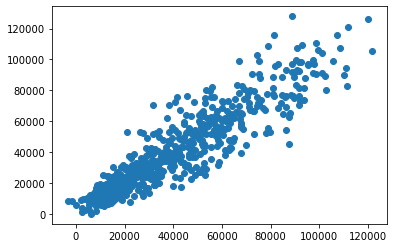

In [13]:
plt.scatter(y_pred, y_test)

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
r2_score(y_pred, y_test)

0.872183245325858

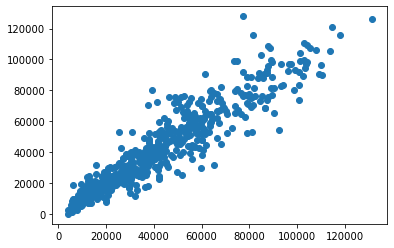

In [16]:
plt.scatter(y_pred, y_test)

### Timeseries Based

In [17]:
df.head()

,Date,Sales,sales,year,month,day,dayofyear,dayofweek,weekofyear
0,2014-01-01,11219,11219,2014,1,1,1,2,1
1,2014-01-02,12745,12745,2014,1,2,2,3,1
2,2014-01-03,10498,10498,2014,1,3,3,4,1
3,2014-01-04,12028,12028,2014,1,4,4,5,1
4,2014-01-05,13900,13900,2014,1,5,5,6,1


In [18]:
len(df)

2547

In [19]:
training = df[df["Date"]< '2018-01-01'].sales.values.reshape(-1, 1)
testing = df[df["Date"]>= '2018-01-01'].sales.values.reshape(-1, 1)

In [20]:
training

array([[11219],
       [12745],
       [10498],
       ...,
       [57683],
       [64561],
       [71068]], dtype=int64)

In [21]:
testing

array([[ 62753],
       [ 66224],
       [ 69700],
       ...,
       [ 99687],
       [115992],
       [ 96095]], dtype=int64)

In [22]:
from sklearn.preprocessing import MinMaxScaler


In [23]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training)

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [24]:
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 6s 53ms/step - loss: 0.0118
Epoch 2/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0049
Epoch 3/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0034
Epoch 4/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0030
Epoch 5/100
24/24 [==============================] - 1s 53ms/step - loss: 0.0030
Epoch 6/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0032
Epoch 7/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0034
Epoch 8/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0032
Epoch 9/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0033
Epoch 10/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0030
Epoch 11/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0030
Epoch 12/100
24/24 [==============================] - 1s 52ms/step - loss: 0.0030
Epoch 13/100
24/24 [=====

In [51]:
dataset_train = df[df["Date"]< '2018-01-01'].sales
dataset_test = df[df["Date"]>= '2018-01-01'].sales

In [89]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
# X_test = []
# for i in range(60, 1100):
#     X_test.append(inputs[i-60:i, 0])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [106]:
X_test = []
y_test = []
for i in range(60, 1000):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [107]:
print(X_test.shape)

(940, 60, 1)


In [108]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [109]:
df[df["Date"]< '2018-01-01']["Date"].shape

(1460,)

In [110]:
predicted_stock_price.shape

(940, 1)

ValueError: x and y must have same first dimension, but have shapes (1460,) and (940, 1)

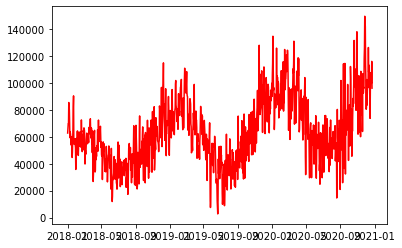

In [111]:
# Visualising the results
plt.plot(df[df["Date"]>= '2018-01-01']["Date"], dataset_test.values, color = 'red', label = 'Real')
plt.plot(df[df["Date"]< '2018-01-01']["Date"], predicted_stock_price, color = 'blue', label = 'Predicted')
# plt.xticks(np.arange(0,459,50))
# plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [112]:
df[df["Date"] < '2018-01-01']["Date"]

0      2014-01-01
1      2014-01-02
2      2014-01-03
3      2014-01-04
4      2014-01-05
          ...    
1455   2017-12-27
1456   2017-12-28
1457   2017-12-29
1458   2017-12-30
1459   2017-12-31
Name: Date, Length: 1460, dtype: datetime64[ns]